In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import make_scorer, accuracy_score
from tensorflow.keras import callbacks

In [ ]:
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
labels_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    # No label for J (9)
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y'
    # No label for Z (25)
}

In [ ]:
# Shuffle the dataset
df_train = shuffle(df_train, random_state=42)

In [ ]:
labels_train = df_train['label'].values
pixels_train = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

labels_test = df_test['label'].values
pixels_test = df_test.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

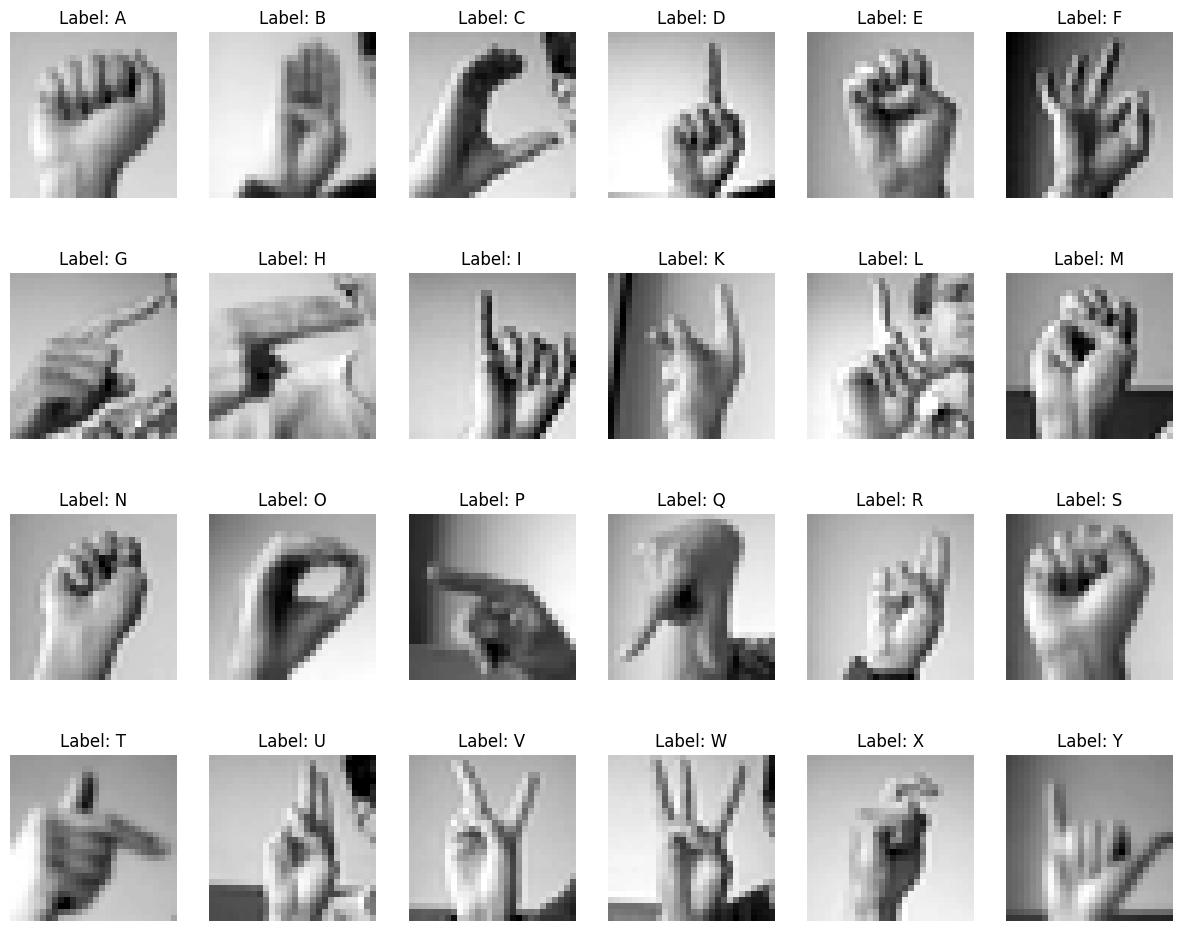

In [ ]:
import matplotlib.pyplot as plt
import random

# Get unique labels
unique_labels = np.unique(labels_train)

# Set the number of images per row and column
images_per_row = 6
images_per_column = 4

# Calculate the number of rows needed
num_rows = int(np.ceil(len(unique_labels) / images_per_row))

# Plot one image from each label
plt.figure(figsize=(15, 3 * num_rows))
for i, label in enumerate(unique_labels, 1):
    # Find the index of the first occurrence of the label
    idx = np.where(labels_train == label)[0][0]

    plt.subplot(num_rows, images_per_row, i)
    plt.imshow(pixels_train[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {labels_mapping.get(label, "Unknown")}')
    plt.axis('off')

plt.show()

In [ ]:
label_binarizer = LabelBinarizer()
labels_train = label_binarizer.fit_transform(labels_train)

label_binarizer = LabelBinarizer()
labels_test = label_binarizer.fit_transform(labels_test)

In [ ]:
# Normalize pixel values to the range [0, 1]
pixels_train = pixels_train / 255.0
pixels_test = pixels_test / 255.0

In [ ]:
# Use ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=30,
    fill_mode='nearest'
)

In [ ]:
# Define a function to build the CNN model
def build_cnn_model(optimizer='adam', learning_rate=0.001, momentum=0.9, filters1=32, filters2=64, dense_units=64):
    model = models.Sequential()
    model.add(layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters2, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters2, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(24, activation='softmax'))

    # Compile the model
    if optimizer == 'adam':
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    elif optimizer == 'sgd':
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        raise ValueError("Unsupported optimizer")

    return model

In [ ]:
# Create the model
cnn_model = build_cnn_model()

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01],
    'momentum': [0.0, 0.8, 0.9],
    'filters1': [32, 64],
    'filters2': [64, 128],
    'dense_units': [64, 128]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid,
                           scoring=make_scorer(accuracy_score),
                           cv=3, verbose=1, n_jobs=-1)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

NameError: ignored

In [ ]:
import numpy as np
from tensorflow.keras import models, layers, callbacks
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Assuming you have loaded and preprocessed your data
# (pixels_train, labels_train, pixels_val, labels_val, pixels_test, labels_test)
pixels_train, pixels_val, labels_train, labels_val = train_test_split(
    pixels_train, labels_train, test_size=0.2, random_state=42
)

In [ ]:


# Your adjusted build_cnn_model function
def build_cnn_model(dense_units=64, optimizer='adam', learning_rate=0.001, momentum=0.9, filters1=32, filters2=64):
    model = models.Sequential()
    model.add(layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters2, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters2, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(24, activation='softmax'))

    # Compile the model
    if optimizer == 'adam':
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    elif optimizer == 'sgd':
        model.compile(optimizer='sgd',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        raise ValueError("Unsupported optimizer")

    return model

# Perform manual grid search
param_grid = {
    'dense_units': [64, 128],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01],
    'momentum': [0.8, 0.9],
    'filters1': [32, 64],
    'filters2': [64, 128],
}

best_model = None
best_accuracy = 0

for params in ParameterGrid(param_grid):
    print("Training model with params:", params)

    # Create and compile the model
    model = build_cnn_model(**params)

    # Train the model
    model.fit(pixels_train, labels_train, epochs=5, validation_data=(pixels_val, labels_val),
              callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

    # Evaluate on Test set
    _, val_accuracy = model.evaluate(pixels_val, labels_val, verbose=0)
    print("Validation Accuracy:", val_accuracy)
    # Evaluate on Test set
    _, test_accuracy = model.evaluate(pixels_test, labels_test, verbose=0)
    print("Test Accuracy:", test_accuracy)

    # Update best model if current model is better
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(pixels_test, labels_test)
print(f'Test accuracy: {test_acc}')

Training model with params: {'dense_units': 64, 'filters1': 32, 'filters2': 64, 'learning_rate': 0.001, 'momentum': 0.8, 'optimizer': 'adam'}
Epoch 1/5
626/626 [==============================] - 23s 34ms/step - loss: 1.2548 - accuracy: 0.6150 - val_loss: 0.4090 - val_accuracy: 0.8647
Epoch 2/5
626/626 [==============================] - 21s 34ms/step - loss: 0.1965 - accuracy: 0.9391 - val_loss: 0.1015 - val_accuracy: 0.9708
Epoch 3/5
626/626 [==============================] - 20s 32ms/step - loss: 0.0454 - accuracy: 0.9912 - val_loss: 0.0377 - val_accuracy: 0.9910
Epoch 4/5
626/626 [==============================] - 23s 37ms/step - loss: 0.0263 - accuracy: 0.9935 - val_loss: 0.0115 - val_accuracy: 0.9978
Epoch 5/5
626/626 [==============================] - 21s 34ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0205 - val_accuracy: 0.9955
Validation Accuracy: 0.9955036044120789
Test Accuracy: 0.8792526721954346
Training model with params: {'dense_units': 64, 'filters1': 32, 'filt

In [ ]:
def build_cnn_model_final(dense_units=64, optimizer='adam', learning_rate=0.01, momentum=0.9, filters1=32, filters2=64):
    model = models.Sequential()
    model.add(layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters2, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters2, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(96, activation='relu'))
    model.add(layers.Dense(24, activation='softmax'))


    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    return model

In [ ]:
# Create augmented data generator for training set
augmented_datagen = datagen.flow(pixels_train, labels_train)

# Rest of your code
final_model = build_cnn_model_final(dense_units=128, optimizer='sgd', learning_rate=0.01, momentum=0.9, filters1=64, filters2=128)

history = final_model.fit(augmented_datagen, epochs=5, validation_data=(pixels_val, labels_val),
                          callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

Epoch 1/5
687/687 [==============================] - 70s 101ms/step - loss: 2.6208 - accuracy: 0.1909 - val_loss: 1.5740 - val_accuracy: 0.4868
Epoch 2/5
687/687 [==============================] - 68s 100ms/step - loss: 1.1148 - accuracy: 0.6235 - val_loss: 0.4907 - val_accuracy: 0.8208
Epoch 3/5
687/687 [==============================] - 71s 103ms/step - loss: 0.4297 - accuracy: 0.8543 - val_loss: 0.2190 - val_accuracy: 0.9160
Epoch 4/5
687/687 [==============================] - 69s 100ms/step - loss: 0.1937 - accuracy: 0.9357 - val_loss: 0.0430 - val_accuracy: 0.9876
Epoch 5/5
687/687 [==============================] - 87s 126ms/step - loss: 0.1127 - accuracy: 0.9636 - val_loss: 0.0640 - val_accuracy: 0.9781


In [ ]:
final_model2 = build_cnn_model_final(dense_units=128, optimizer='sgd', learning_rate=0.01, momentum=0.9, filters1=64, filters2=128)

history2 = final_model2.fit(pixels_train, labels_train, epochs=5, validation_data=(pixels_val, labels_val),
              callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])




Epoch 1/5
687/687 [==============================] - 65s 92ms/step - loss: 1.8373 - accuracy: 0.4350 - val_loss: 0.3966 - val_accuracy: 0.8749
Epoch 2/5
687/687 [==============================] - 62s 90ms/step - loss: 0.1491 - accuracy: 0.9551 - val_loss: 0.3582 - val_accuracy: 0.9250
Epoch 3/5
687/687 [==============================] - 75s 109ms/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 7.0342e-04 - val_accuracy: 1.0000
Epoch 4/5
687/687 [==============================] - 62s 91ms/step - loss: 4.3665e-04 - accuracy: 1.0000 - val_loss: 3.7729e-04 - val_accuracy: 1.0000
Epoch 5/5
687/687 [==============================] - 81s 118ms/step - loss: 2.6143e-04 - accuracy: 1.0000 - val_loss: 2.7354e-04 - val_accuracy: 1.0000


Epoch 1/5
687/687 [==============================] - 71s 103ms/step - loss: 0.0643 - accuracy: 0.9795 - val_loss: 0.0376 - val_accuracy: 0.9851
Epoch 2/5
687/687 [==============================] - 69s 100ms/step - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.0190 - val_accuracy: 0.9934
Epoch 3/5
687/687 [==============================] - 77s 112ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0448 - val_accuracy: 0.9860
Epoch 4/5
687/687 [==============================] - 69s 100ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0076 - val_accuracy: 0.9989
Epoch 5/5
687/687 [==============================] - 69s 100ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0169 - val_accuracy: 0.9945


ValueError: ignored

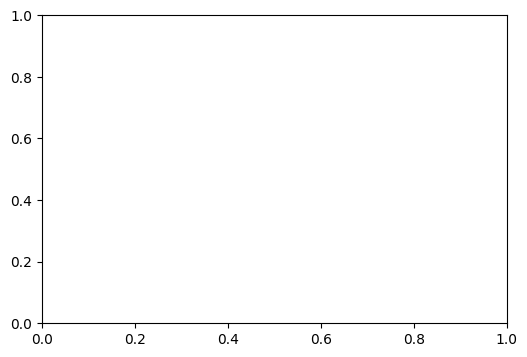

In [ ]:
# Lists to store training history
loss_history = []
accuracy_history = []
batch_count = 0  # Counter for batches within an epoch


def plot_training_history(epoch, logs):
    global batch_count
    accuracy_history.append(logs['accuracy'])

    batch_count += 1

# Train the model with the callback
history3 = final_model.fit(augmented_datagen, epochs=5, validation_data=(pixels_val, labels_val),
                          callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                                     callbacks.LambdaCallback(on_batch_end=plot_training_history)])




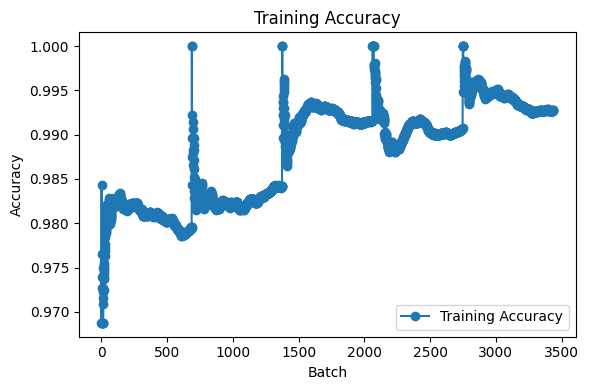

In [ ]:
# Plotting the training history
plt.figure(figsize=(6, 4))

# Plot Accuracy
plt.plot(range(0, batch_count), accuracy_history, marker='o', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

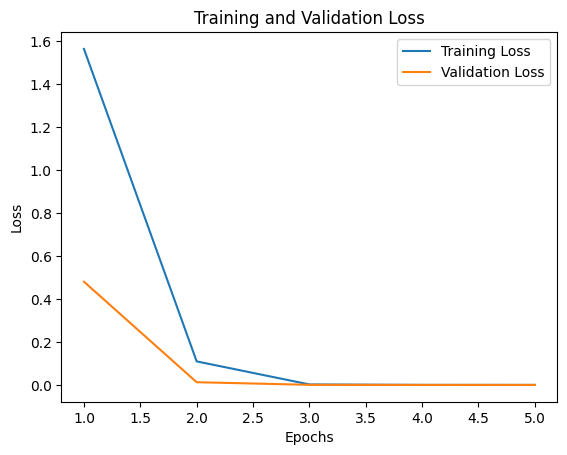

In [ ]:
# Plot the training loss
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
_, val_accuracy = final_model.evaluate(pixels_val, labels_val, verbose=0)
print("Validation Accuracy:", val_accuracy)

_, test_accuracy = final_model.evaluate(pixels_test, labels_test, verbose=0)
print("Test Accuracy:", test_accuracy)

_, val_accuracy2 = final_model2.evaluate(pixels_val, labels_val, verbose=0)
print("Validation Accuracy:", val_accuracy2)

_, test_accuracy2 = final_model2.evaluate(pixels_test, labels_test, verbose=0)
print("Test Accuracy:", test_accuracy2)

Validation Accuracy: 0.9945365190505981
Test Accuracy: 0.9230340123176575
Validation Accuracy: 1.0
Test Accuracy: 0.9185722470283508


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report, confusion_matrix

# Use the model to make predictions on the test data
y_pred = final_model.predict(pixels_test)




225/225 [==============================] - 5s 20ms/step


In [ ]:
print("Model output")
print(y_pred[0])
print()
print("Actual label")
print(labels_test[0])

#binary_result = (y_pred == np.max(y_pred, axis=1, keepdims=True)).astype(int)



# Convert the list of lists to indices where 1 is present
indices_lists = [np.where(np.array(lst) == 1)[0] for lst in y_pred]
indices_lists2 = [np.where(np.array(lst) == 1)[0] for lst in labels_test]
# Flatten the result
flattened_indices = np.concatenate(indices_lists)
flattened_indices2 = np.concatenate(indices_lists2)
# Convert the result to a Python list
result_list = list(flattened_indices)
result_list2 = list(flattened_indices)
# Print the result

Model output
[2.1611436e-22 6.8898947e-14 5.2787691e-06 5.0646572e-17 4.2444114e-13
 2.5736176e-07 9.9992722e-01 2.8762653e-07 1.1765963e-19 1.4477650e-16
 5.5879398e-05 7.9572573e-16 8.8052426e-20 4.2495234e-09 4.1921328e-12
 1.0237361e-10 1.6971605e-16 6.9198181e-10 1.1016871e-05 1.9453151e-15
 2.8963109e-08 1.0445574e-09 1.2999800e-13 3.3617401e-16]

Actual label
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


true_labels = result_list
predicted_labels = result_list2

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)


# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
# Generate a classification report
print(classification_report(true_labels, predicted_labels))

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
print("\nEvaluation Result\n")
accuracy = accuracy_score(labels_test, y_pred)
roc_auc = roc_auc_score(labels_test, y_pred)
coh_kap = cohen_kappa_score(labels_test, y_pred)

print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print("Cohen's Kappa = {}".format(coh_kap))